In [11]:
# eda_cleaning.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from nltk.sentiment import SentimentIntensityAnalyzer


In [12]:

# --------------------------
# Load Dataset
# --------------------------
customer_df = pd.read_csv("../data/customer_intelligence_dataset.csv")  # Or read_excel("...xlsx")

In [13]:

# --------------------------
# 2. Initial Checks
# --------------------------
print("Shape:", customer_df.shape)
print("Null Values:\n", customer_df.isnull().sum())
print("Duplicates:", customer_df.duplicated().sum())
print(" Data Types:\n", customer_df.dtypes)

Shape: (8000, 18)
Null Values:
 sale_id               0
customer_id           0
product_id            0
product_name          0
category              0
price                 0
quantity              0
sale_date             0
total_value           0
age                   0
gender                0
region                0
segment               0
churn                 0
tenure_months         0
last_purchase_date    0
feedback_text         0
sentiment             0
dtype: int64
Duplicates: 0
 Data Types:
 sale_id               object
customer_id           object
product_id            object
product_name          object
category              object
price                  int64
quantity               int64
sale_date             object
total_value            int64
age                    int64
gender                object
region                object
segment               object
churn                  int64
tenure_months          int64
last_purchase_date    object
feedback_text         object
se

In [14]:

# --------------------------
# 3. Data Cleaning
# --------------------------

# Convert date columns
customer_df['sale_date'] = pd.to_datetime(customer_df['sale_date'], errors='coerce')
customer_df['last_purchase_date'] = pd.to_datetime(customer_df['last_purchase_date'], errors='coerce')

# Strip whitespace and standardize case for categorical columns
customer_df['region'] = customer_df['region'].str.strip().str.title()
customer_df['segment'] = customer_df['segment'].str.strip().str.title()
customer_df['gender'] = customer_df['gender'].str.strip().str.title()

# Check for missing values
print("\nNulls:\n", customer_df.isnull().sum())

# Drop rows with critical missing values (dates, price, quantity, age, etc.)
customer_df.dropna(subset=[
    'sale_date', 'last_purchase_date', 'price', 'quantity', 'age', 'tenure_months'
], inplace=True)

# Drop duplicates
customer_df.drop_duplicates(inplace=True)

sia = SentimentIntensityAnalyzer()

# Define function to get sentiment label
def get_sentiment_label(text):
    if pd.isna(text):
        return 'neutral'  # Optional: handle missing values
    score = sia.polarity_scores(str(text))['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply function to feedback_text
customer_df['sentiment'] = customer_df['feedback_text'].apply(get_sentiment_label)



# Remove invalid values
customer_df = customer_df[
    (customer_df['price'] >= 0) &
    (customer_df['quantity'] > 0) &
    (customer_df['age'] > 0) &
    (customer_df['tenure_months'] >= 0)
]

# Reset index after cleaning
customer_df.reset_index(drop=True, inplace=True)

# Confirm types again
print("\nUpdated dtypes:\n", customer_df.dtypes)





Nulls:
 sale_id               0
customer_id           0
product_id            0
product_name          0
category              0
price                 0
quantity              0
sale_date             0
total_value           0
age                   0
gender                0
region                0
segment               0
churn                 0
tenure_months         0
last_purchase_date    0
feedback_text         0
sentiment             0
dtype: int64

Updated dtypes:
 sale_id                       object
customer_id                   object
product_id                    object
product_name                  object
category                      object
price                          int64
quantity                       int64
sale_date             datetime64[ns]
total_value                    int64
age                            int64
gender                        object
region                        object
segment                       object
churn                          int64
tenure_mon

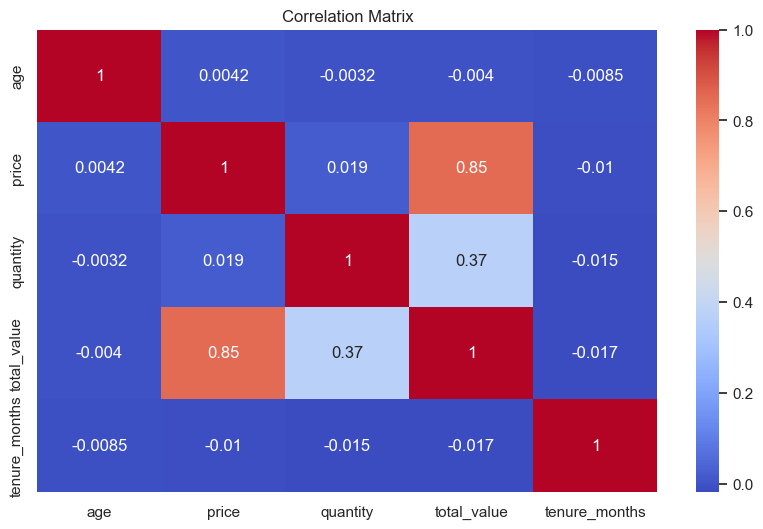

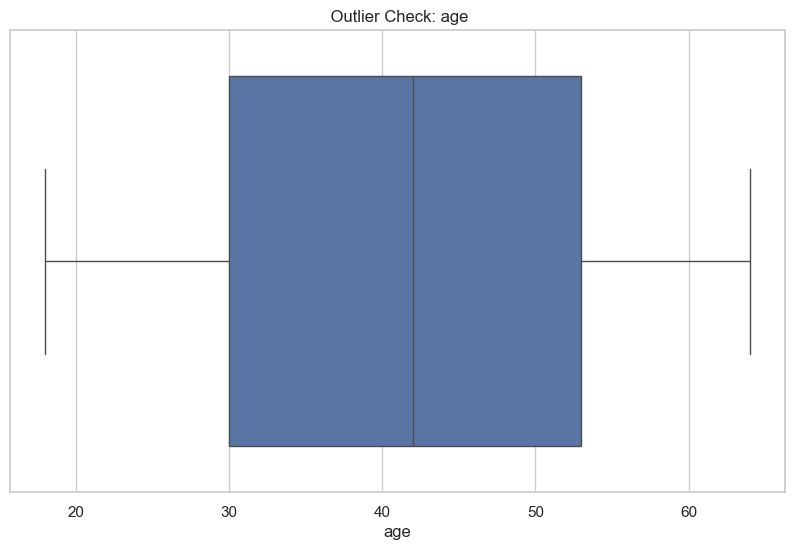

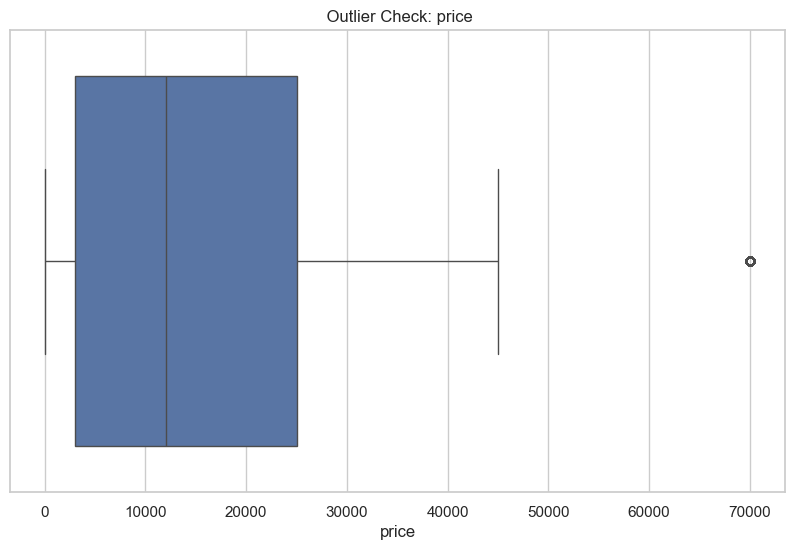

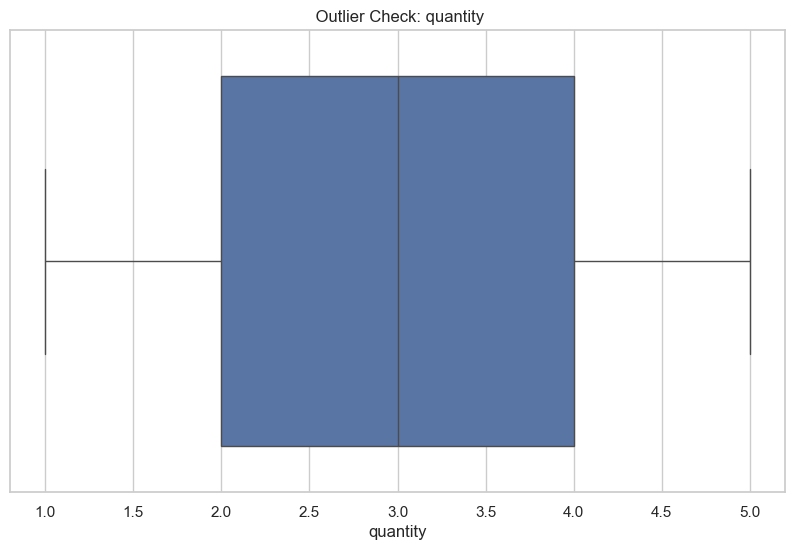

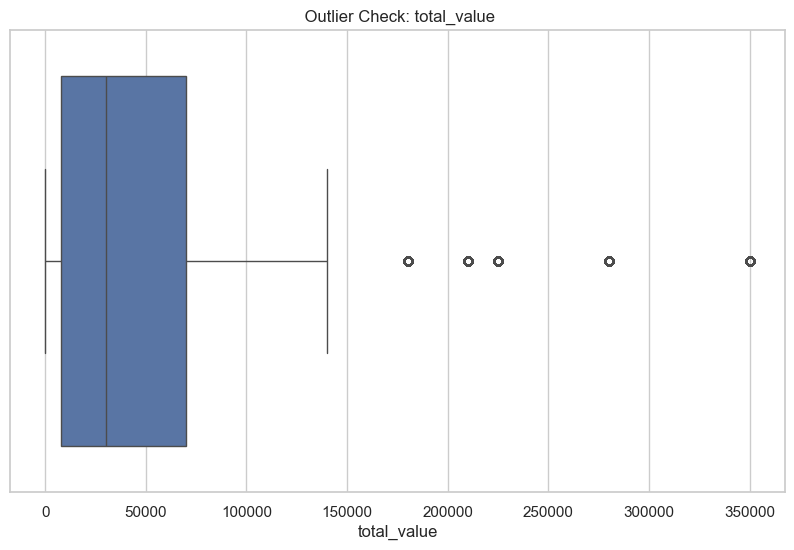

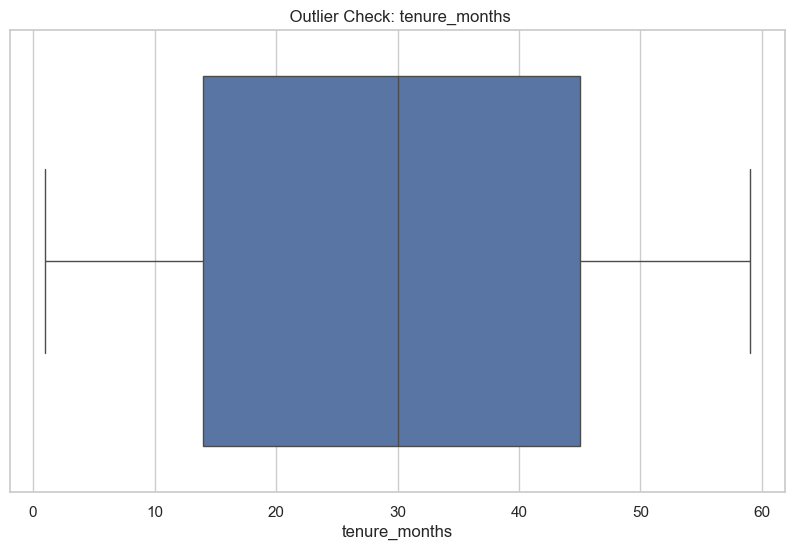

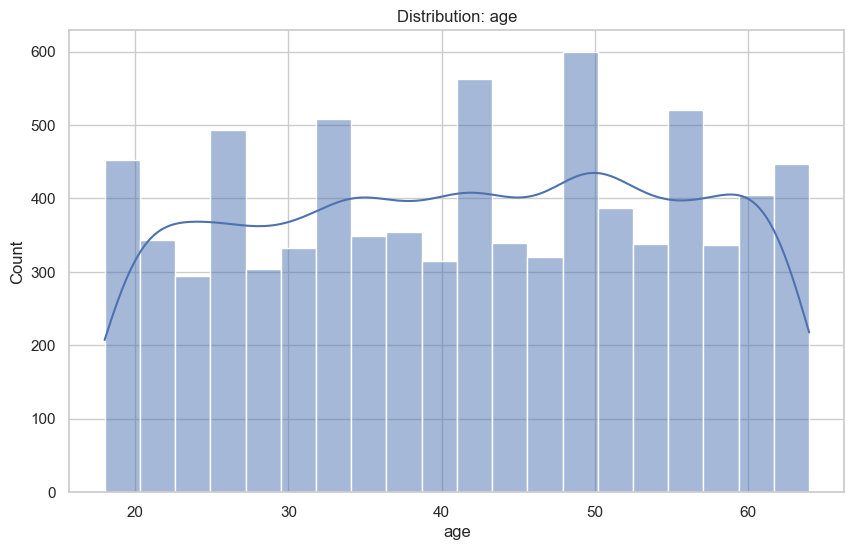

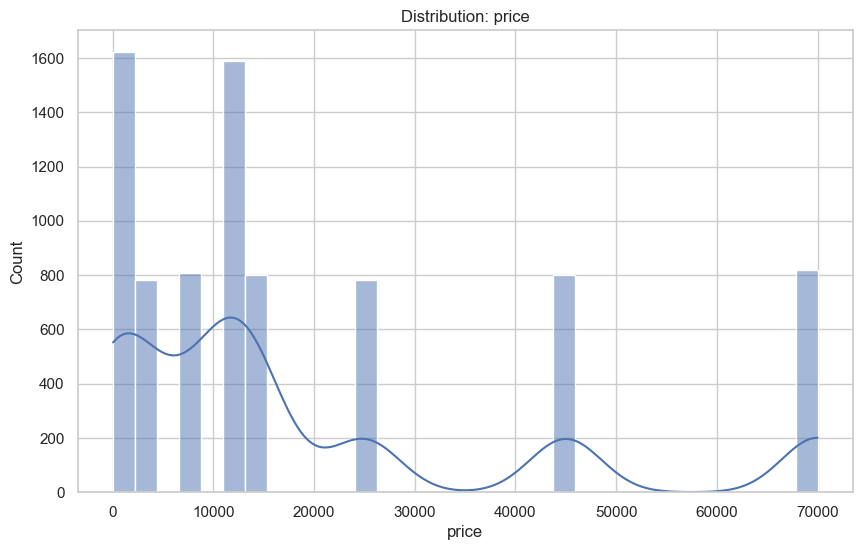

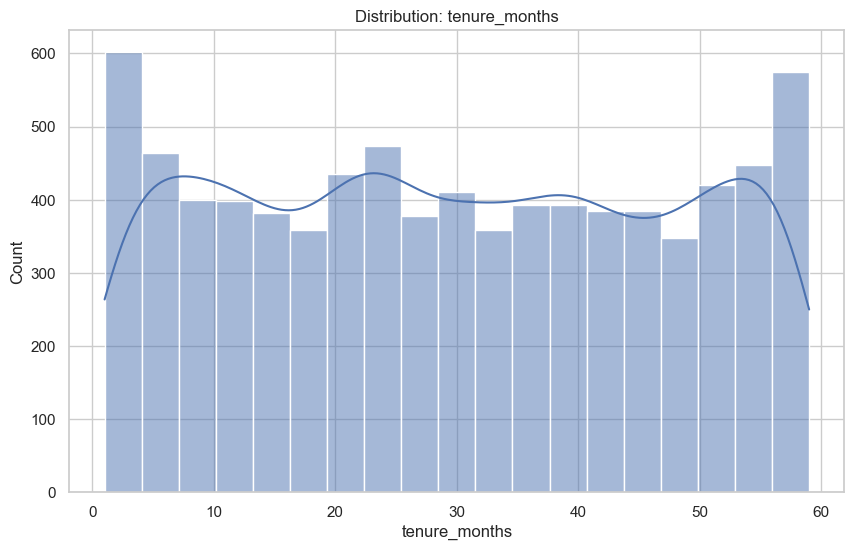

In [15]:
# --------------------------
# 4. EDA Visualizations
# --------------------------
# Correlation matrix

numeric_cols = ["age", "price", "quantity", "total_value", "tenure_months"]

corr = customer_df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Boxplots for outlier view
for col in numeric_cols:
    sns.boxplot(data=customer_df, x=col)
    plt.title(f" Outlier Check: {col}")
    plt.show()

# Distribution plots
for col in ["age", "price", "tenure_months"]:
    sns.histplot(customer_df[col], kde=True)
    plt.title(f"Distribution: {col}")
    plt.show()

age: Removed 0 outliers
price: Removed 481 outliers
quantity: Removed 0 outliers
total_value: Removed 159 outliers
tenure_months: Removed 0 outliers
Final shape: (6225, 18)


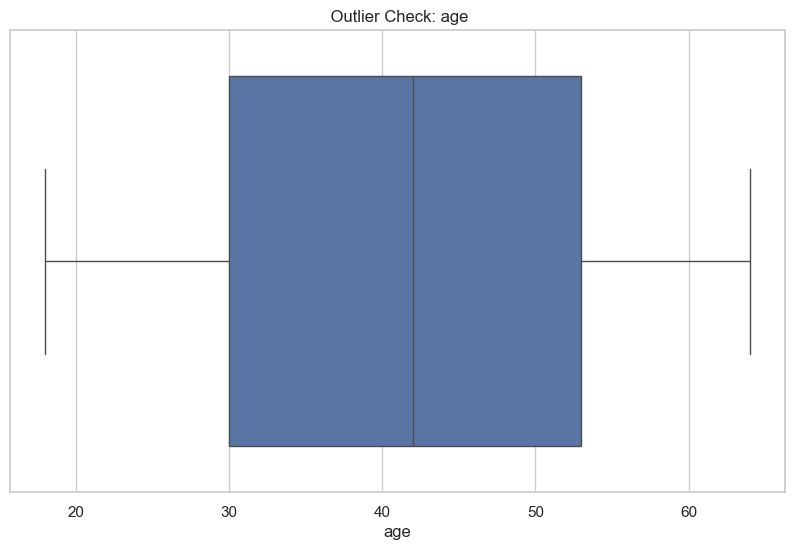

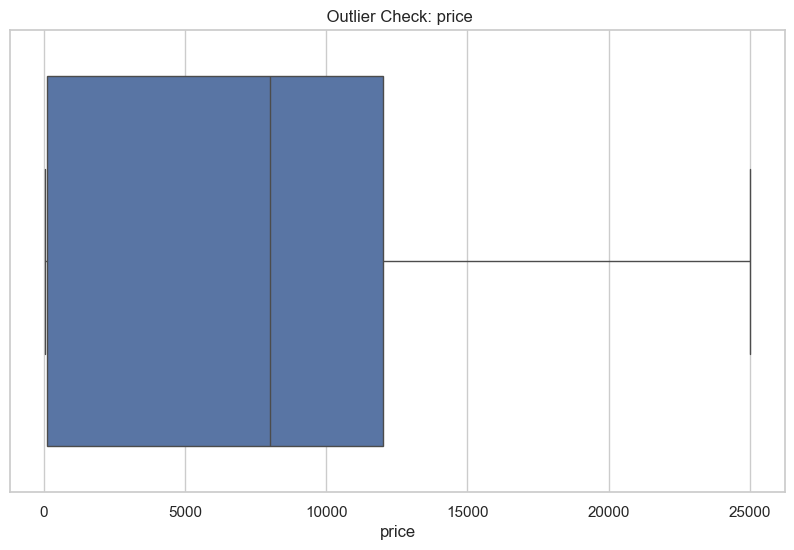

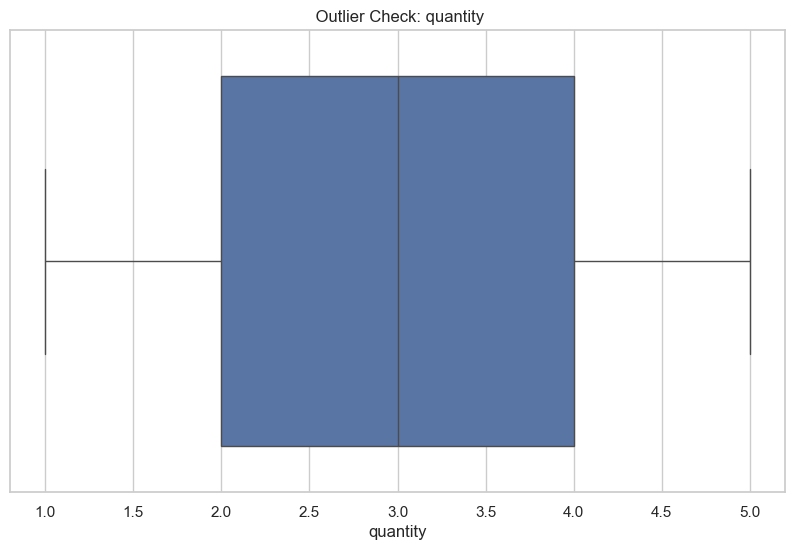

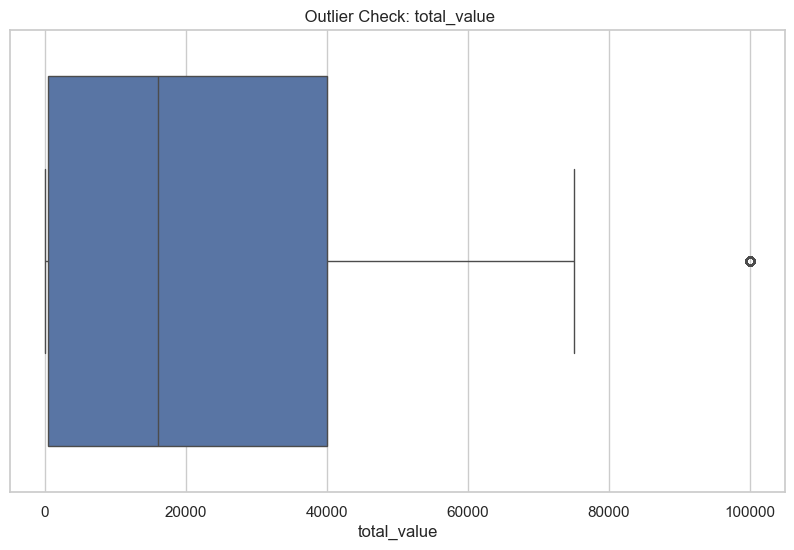

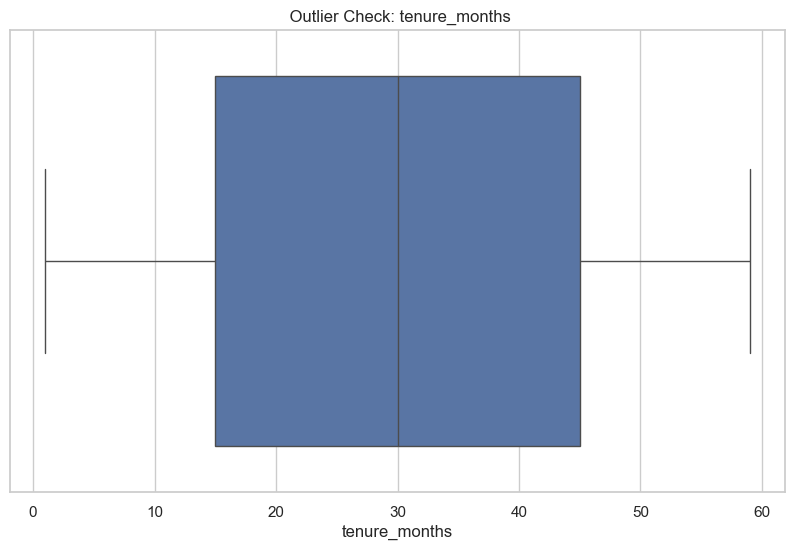

In [18]:
for col in numeric_cols:
    Q1 = customer_df[col].quantile(0.25)
    Q3 = customer_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    before = customer_df.shape[0]
    customer_df = customer_df[(customer_df[col] >= lower) & (customer_df[col] <= upper)]
    after = customer_df.shape[0]
    print(f"{col}: Removed {before - after} outliers")

# Final shape after cleaning
customer_df = customer_df.reset_index(drop=True)
print("Final shape:", customer_df.shape)


for col in numeric_cols:
    sns.boxplot(data=customer_df, x=col)
    plt.title(f" Outlier Check: {col}")
    plt.show()

/Users/shubhau/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129485 (\N{STANDING PERSON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


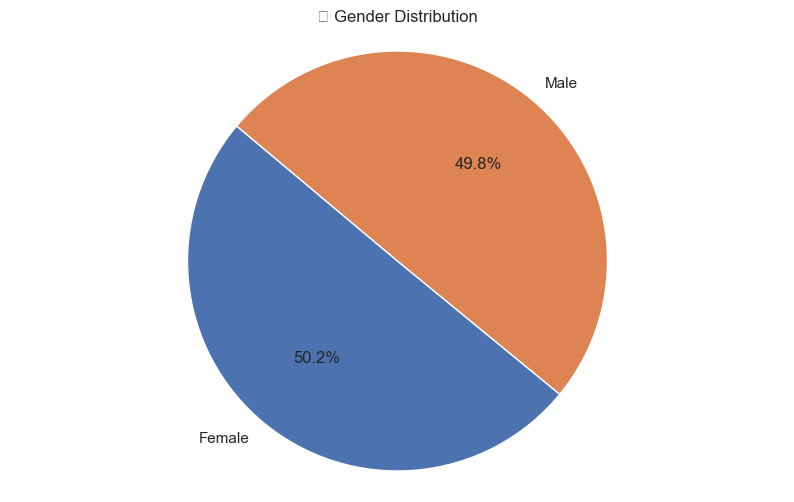

/Users/shubhau/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127991 (\N{LABEL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shubhau/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


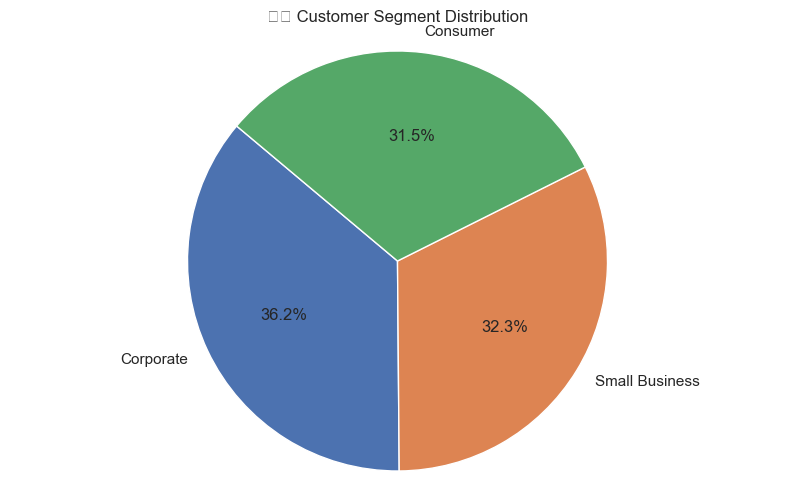

/Users/shubhau/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


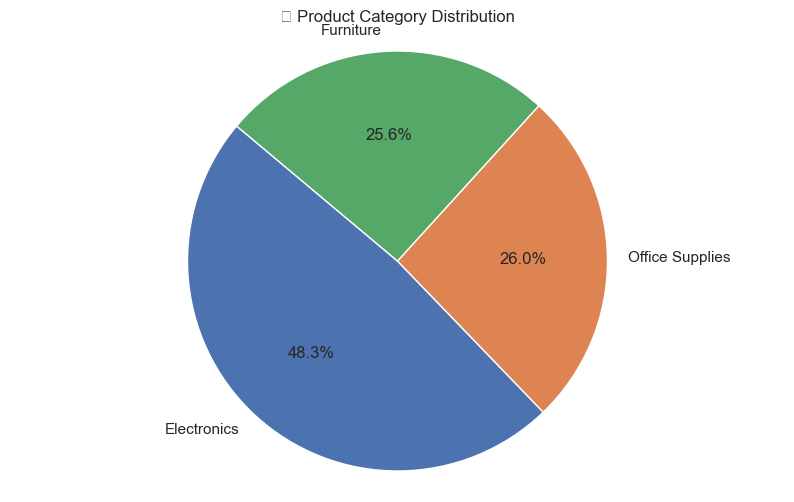

/var/folders/zt/wczhdn1s3_n_3tj8j25wrpgm0000gn/T/ipykernel_19549/3943886266.py:60: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/Users/shubhau/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


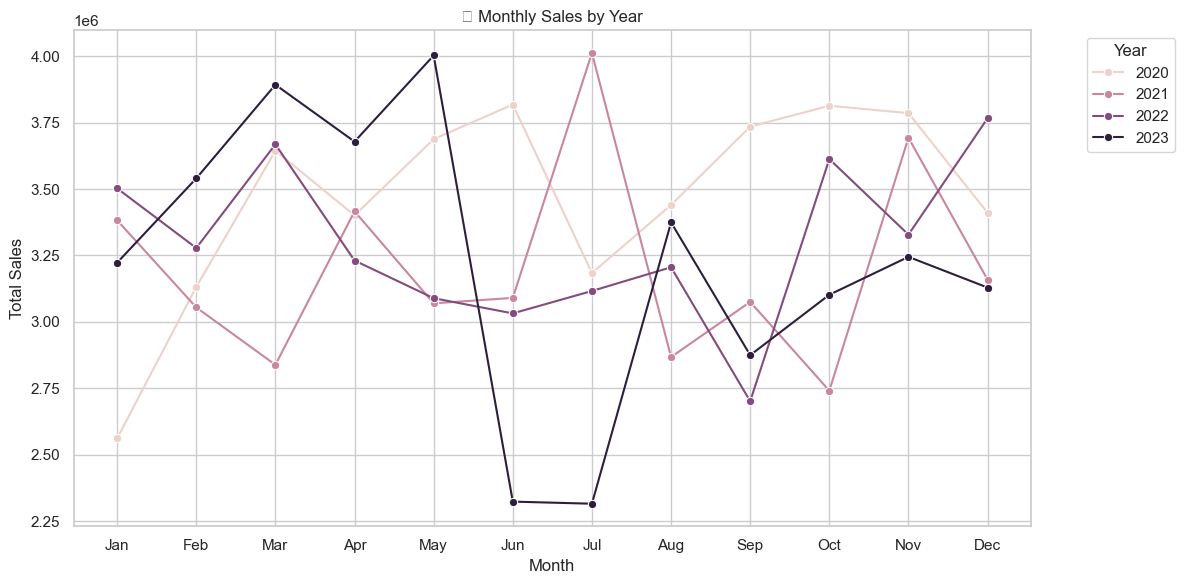

/var/folders/zt/wczhdn1s3_n_3tj8j25wrpgm0000gn/T/ipykernel_19549/3943886266.py:85: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/Users/shubhau/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


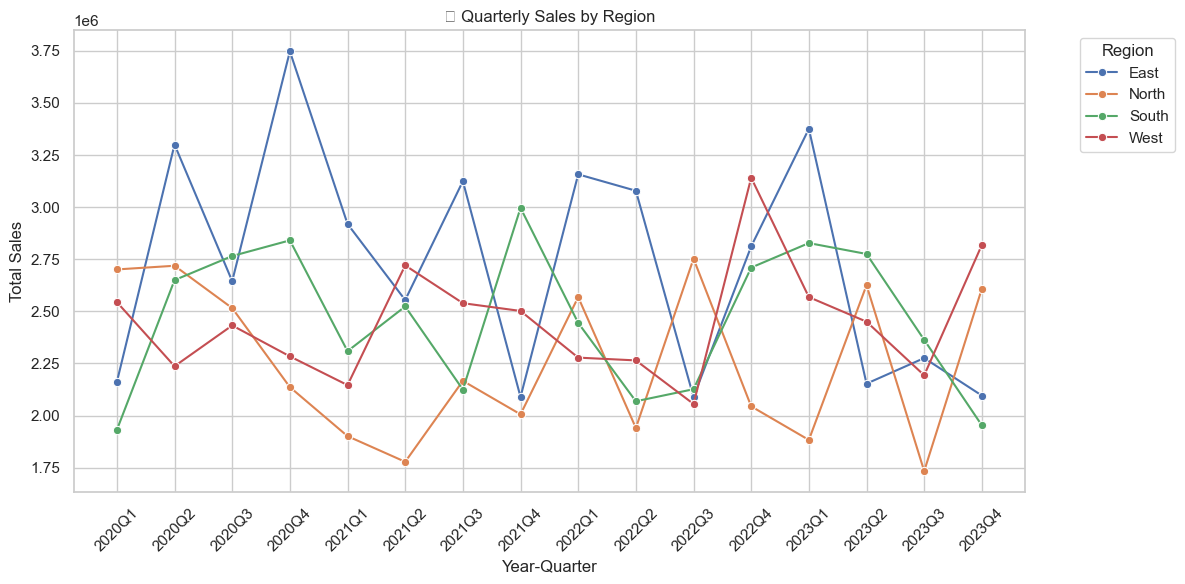

/var/folders/zt/wczhdn1s3_n_3tj8j25wrpgm0000gn/T/ipykernel_19549/3943886266.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=customer_df, x='segment', y='age', palette="muted")
/Users/shubhau/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127931 (\N{VIOLIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


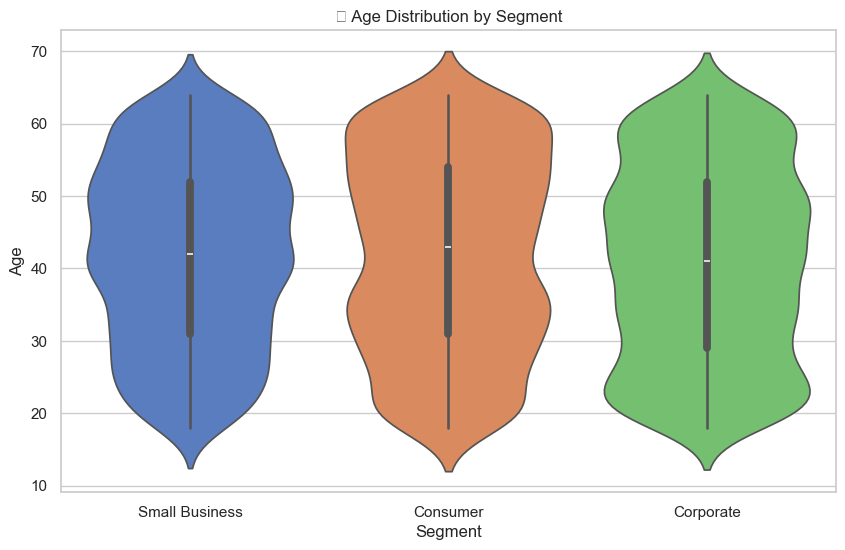

/var/folders/zt/wczhdn1s3_n_3tj8j25wrpgm0000gn/T/ipykernel_19549/3943886266.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=customer_df, x='churn', y='total_value', palette="Set2")
/Users/shubhau/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127931 (\N{VIOLIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


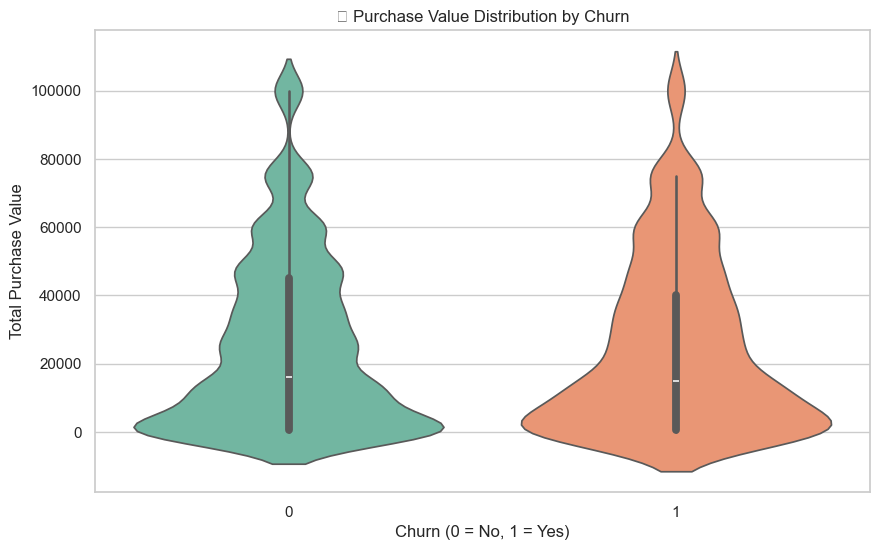

In [19]:


# Set plotting style
sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (10, 6)

# ----------------------------------------
# 1. 📌 PIE CHARTS
# ----------------------------------------

# Gender distribution
gender_counts = customer_df['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('🧍 Gender Distribution')
plt.axis('equal')
plt.show()

# Segment distribution
segment_counts = customer_df['segment'].value_counts()
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('🏷️ Customer Segment Distribution')
plt.axis('equal')
plt.show()

# Category distribution
category_counts = customer_df['category'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('📦 Product Category Distribution')
plt.axis('equal')
plt.show()

# ----------------------------------------
# 2. 📈 LINE CHARTS with Legends
# ----------------------------------------

# Extract Month and Year
customer_df['month'] = customer_df['sale_date'].dt.strftime('%b')         # Jan, Feb, ...
customer_df['year'] = customer_df['sale_date'].dt.year

# Monthly sales grouped by year
monthly_sales = (
    customer_df
    .groupby(['year', 'month'])['total_value']
    .sum()
    .reset_index()
)

# To ensure Jan–Dec order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_sales['month'] = pd.Categorical(monthly_sales['month'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values(['year', 'month'])

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='month', y='total_value', hue='year', marker='o')

plt.title("📈 Monthly Sales by Year")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Extract year-quarter
customer_df['quarter'] = customer_df['sale_date'].dt.to_period('Q').astype(str)

# Group sales by quarter and region
quarterly_sales = (
    customer_df
    .groupby(['quarter', 'region'])['total_value']
    .sum()
    .reset_index()
    .sort_values(by='quarter')
)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=quarterly_sales, x='quarter', y='total_value', hue='region', marker='o')

plt.title("📈 Quarterly Sales by Region")
plt.xlabel("Year-Quarter")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# ----------------------------------------
# 3. 🎻 VIOLIN PLOTS
# ----------------------------------------

# Age vs Segment
sns.violinplot(data=customer_df, x='segment', y='age', palette="muted")
plt.title("🎻 Age Distribution by Segment")
plt.xlabel("Segment")
plt.ylabel("Age")
plt.show()

# Total Value vs Churn
sns.violinplot(data=customer_df, x='churn', y='total_value', palette="Set2")
plt.title("🎻 Purchase Value Distribution by Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Total Purchase Value")
plt.show()


recalculated_sentiment
positive    4771
negative    2413
neutral      816
Name: count, dtype: int64
sentiment
Positive    3926
Neutral     2444
Negative    1630
Name: count, dtype: int64


In [20]:
# Optional: Save cleaned version
customer_df.to_csv("../data/cleaned_customer_data.csv", index=False)
print("✅ Cleaned file saved at: ../data/cleaned_customer_data.csv")

✅ Cleaned file saved at: ../data/cleaned_customer_data.csv
